In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

In [2]:
#import iris dataset
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
dataset.columns = ['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'species']

In [3]:
dataset.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


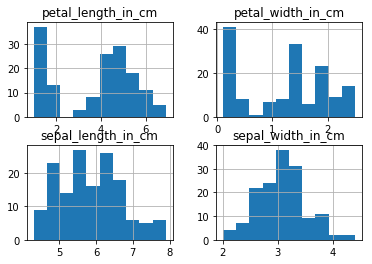

In [5]:
#Histograms
dataset.hist()
plt.show()

C:\Users\mnamagir\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


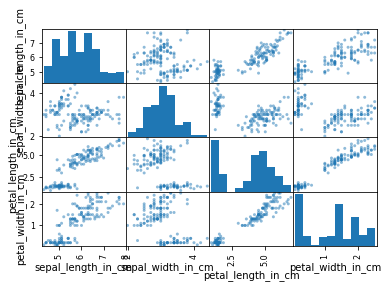

In [6]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [8]:
X = dataset.iloc[:, 0:3].values
y = dataset.iloc[:, 4].values

In [9]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [10]:
X1 = X[:, 0] #X-Axis - sepal length
X2 = X[:, 1] #y-Axis - sepal length
species = y #species

X1_min, X1_max = X1.min() - .5,X1.max() + .5
X2_min, X2_max = X2.min() - .5,X2.max() + .5

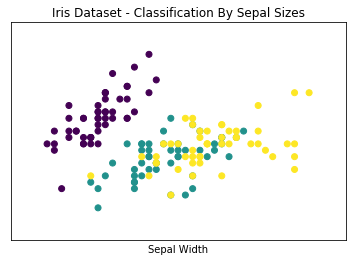

In [11]:
#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Sepal Sizes')
plt.scatter(X1,X2, c=species)
plt.xlabel('Sepal Length')
plt.xlabel('Sepal Width')
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [12]:
X3 = X[:, 2] #X-Axis - petal length
X4 = dataset.iloc[:, 3].values #y-Axis - petal length
species = y #species

X3_min, X3_max = X3.min() - .5,X3.max() + .5
X4_min, X4_max = X4.min() - .5,X4.max() + .5

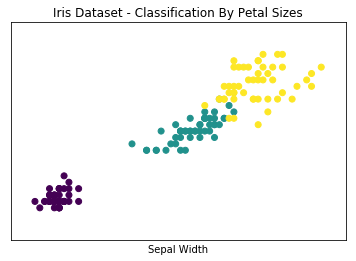

In [13]:
#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Petal Sizes')
plt.scatter(X3,X4, c=species)
plt.xlabel('Sepal Length')
plt.xlabel('Sepal Width')
plt.xlim(X3_min, X3_max)
plt.ylim(X4_min, X4_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [14]:
label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

attr_dict = {0: 'sepal length', 
            1:  'sepal width', 
            2:  'petal length', 
            3:  'petal width'}

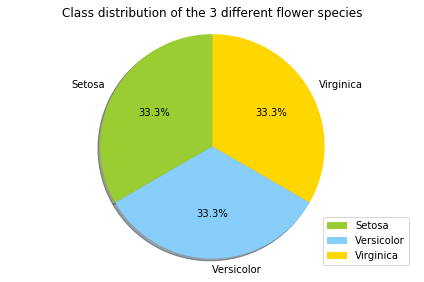

In [15]:
# Pie chart
plt.pie(
    [X[y==i].shape[0] for i in range(3)],
    labels=[label_dict[i] for i in range(3)],
    shadow=True,
    colors=('yellowgreen', 'lightskyblue', 'gold'),
    startangle=90,      # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',  # display fraction as percentage
    )

plt.legend(fancybox=True, loc='lower right')

plt.title('Class distribution of the 3 different flower species')
plt.axis('equal')     # plot pyplot as circle

plt.tight_layout()

plt.show()

In [16]:
#from sklearn.decomposition import PCA
#X_reduced = PCA(n_components=3).fit_transform(X)

In [17]:
# 3D Visualization 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA  #PCA
X_reduced = PCA(n_components=3).fit_transform(X)

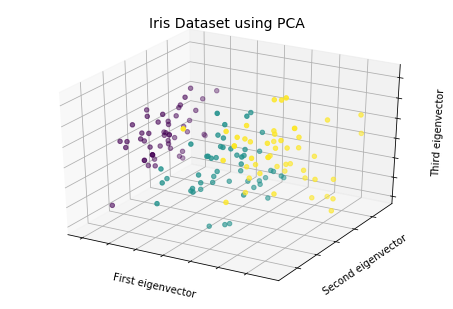

In [18]:
#SCATTERPLOT 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset using PCA', size = 14)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=species)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Users\mnamagir\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [23]:
classifier.score(X_train, y_train)

0.95833333333333337

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
cm

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]])

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.933333333333
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.85      0.92        13
          2       0.75      1.00      0.86         6

avg / total       0.95      0.93      0.94        30

